<a href="https://colab.research.google.com/github/emmanuellaanggi/grad_assignments/blob/main/GAN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Emmanuella Anggi Siallagan (2106678006) & Sheren Afryan Tiastama (2106774982)

# **Problem 1 (35 pts)**



Dataset for odd Groups : https://www.tensorflow.org/datasets/catalog/beans

In [ ]:
# Importing all the essensial library for problem 1
# including the visualization, multidimensional array, datasets, and training

import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
import tensorflow_datasets as tfds
from tensorflow.keras import layers

#### **Split the dataset into training, validation, and testing sets.**

In [ ]:
# SOURCE: https://www.tensorflow.org/tutorials/images/data_augmentation

In [ ]:
# Dividing the datasets into Training, Validation, Testing (as provided by the tensorflow)

(train_ds, val_ds, test_ds), metadata = tfds.load(
    'beans',
    split=['train[:80%]', 'train[80%:90%]', 'train[90%:]'],
    with_info=True,
    as_supervised=True,
)

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

0 examples [00:00, ? examples/s]

Shuffling and writing examples to /root/tensorflow_datasets/beans/0.1.0.incompleteIA8C71/beans-train.tfrecord


  0%|          | 0/1034 [00:00<?, ? examples/s]

0 examples [00:00, ? examples/s]

Shuffling and writing examples to /root/tensorflow_datasets/beans/0.1.0.incompleteIA8C71/beans-validation.tfrecord


  0%|          | 0/133 [00:00<?, ? examples/s]

0 examples [00:00, ? examples/s]

Shuffling and writing examples to /root/tensorflow_datasets/beans/0.1.0.incompleteIA8C71/beans-test.tfrecord


  0%|          | 0/128 [00:00<?, ? examples/s]

Dataset beans downloaded and prepared to /root/tensorflow_datasets/beans/0.1.0. Subsequent calls will reuse this data.


#### **Apply data augmentation for the training dataset**

##### **Understanding the datasets**

In [ ]:
# Looking at the classes to understand the data
num_classes = metadata.features['label'].num_classes
print(num_classes)

3


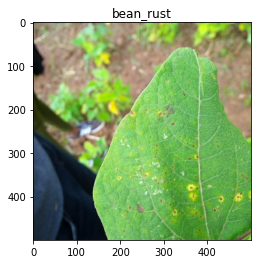

In [ ]:
# Visualized the image that we're using
get_label_name = metadata.features['label'].int2str

image, label = next(iter(train_ds))
_ = plt.imshow(image)
_ = plt.title(get_label_name(label))

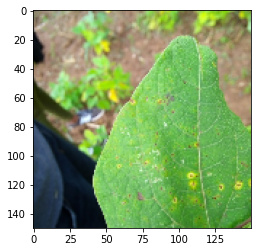

In [ ]:
# New image size (size following the source on tutorial for image augmentation from Tensorflow)
IMG_SIZE = 150

resize_and_rescale = tf.keras.Sequential([
  layers.Resizing(IMG_SIZE, IMG_SIZE),
  layers.Rescaling(1./255)
]) 

# Showing the resized & rescaled image dataset
result = resize_and_rescale(image)
_ = plt.imshow(result)

In [ ]:
# Making sure that the value on the training set is in between 0 and 1
print("Min and max pixel values:", result.numpy().min(), result.numpy().max())

Min and max pixel values: 0.0 1.0


**Data Augmentation**

In [ ]:
# Data augmentation layer
data_augmentation = tf.keras.Sequential([
  layers.RandomFlip("horizontal_and_vertical"),
  layers.RandomRotation(0.2),
])

# Then add image to the batch
image = tf.expand_dims(image, 0)

In [ ]:
# Visualized the image data that went through the augmentation

plt.figure(figsize=(10, 10))
for i in range(9):
  augmented_image = data_augmentation(image)
  ax = plt.subplot(3, 3, i + 1)
  plt.imshow(augmented_image[0])
  plt.axis("off")

In [ ]:
# Applying the resize and rescale for the training dataset
aug_ds = train_ds.map(
  lambda x, y: (resize_and_rescale(x, training=True), y))

In [ ]:
# parting the dataset into batches before applying all the function set beforehand
batch_size = 32
AUTOTUNE = tf.data.AUTOTUNE

# include all the process into a function 
def prepare(ds, shuffle=False, augment=False):
  ds = ds.map(lambda x, y: (resize_and_rescale(x), y), 
              num_parallel_calls=AUTOTUNE)

  if shuffle:
    ds = ds.shuffle(1000)

  ds = ds.batch(batch_size)

  if augment:
    ds = ds.map(lambda x, y: (data_augmentation(x, training=True), y), 
                num_parallel_calls=AUTOTUNE)

  return ds.prefetch(buffer_size=AUTOTUNE)

In [ ]:
# augmented the dataset with function stated

train_ds = prepare(train_ds, shuffle=True, augment=True)
val_ds = prepare(val_ds)
test_ds = prepare(test_ds)

In [ ]:
# defined parameter for the assignment

epochs = 10

#### **Create a simple CNN model**

(the architecture are not specified, but make sure at least have 3 Convolution layers)

In [ ]:
# 3 layer convolution layers as baseline for this assignment

model_cnn = tf.keras.Sequential([
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

#### **Hyperparameters tuning on batch size, learning rate, and epoch**

In [ ]:
# compiling the layers, the optimizer, and the expected accuracy metrics to be shown
model_cnn.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [ ]:
# training the model with train_ds that already prepare by augmentation before, storing the history of training
history = model_cnn.fit(train_ds, validation_data=val_ds, epochs=epochs, batch_size=batch_size)

Epoch 1/10
26/26 [==============================] - 21s 757ms/step - loss: 1.1366 - accuracy: 0.4002 - val_loss: 1.0065 - val_accuracy: 0.5481
Epoch 2/10
26/26 [==============================] - 20s 751ms/step - loss: 0.8941 - accuracy: 0.6082 - val_loss: 0.8068 - val_accuracy: 0.6346
Epoch 3/10
26/26 [==============================] - 20s 749ms/step - loss: 0.7744 - accuracy: 0.6602 - val_loss: 0.8613 - val_accuracy: 0.6346
Epoch 4/10
26/26 [==============================] - 20s 754ms/step - loss: 0.7121 - accuracy: 0.6941 - val_loss: 0.8593 - val_accuracy: 0.6731
Epoch 5/10
26/26 [==============================] - 20s 757ms/step - loss: 0.7249 - accuracy: 0.6723 - val_loss: 0.8887 - val_accuracy: 0.6346
Epoch 6/10
26/26 [==============================] - 20s 748ms/step - loss: 0.6831 - accuracy: 0.7170 - val_loss: 0.6169 - val_accuracy: 0.7404
Epoch 7/10
26/26 [==============================] - 20s 752ms/step - loss: 0.6592 - accuracy: 0.7243 - val_loss: 0.6403 - val_accuracy: 0.7596

#### **Evaluate using accuracy, sensitivity, specificity, and F1 score.**
You can add more evaluation metrics that you think suitable for image classification

**Evaluation Function this point and later on Resnet50**

In [ ]:
# importing needed library for evaluation

from sklearn.metrics import classification_report
import pandas as pd
from sklearn import metrics
from sklearn.metrics import precision_recall_fscore_support

In [ ]:
# to ease the calling of every metrics used for evaluation
# we created a function so that we don't have to stated the process later on the resnet50 model

def evaluate_this(model, test_df = test_ds):
  # Testing the accuracy with testing data to the model
  loss, acc = model.evaluate(test_ds)
  print("Accuracy of this model ", acc)

  # applying the model to create a prediction to be compared to the testing set
  probability_model = tf.keras.Sequential([model,  tf.keras.layers.Softmax()])
  predictions = probability_model.predict(test_ds)
  y_pred = [np.argmax(predictions[i]) for i in range(len(predictions))]
  y_true = np.concatenate([y for x, y in test_ds], axis=0).tolist()

  # stating all the class given in the datase
  target_names = ['class 0', 'class 1', 'class 2']

  # use the classification report to describe the evaluation for the model result
  report = metrics.classification_report(np.array(y_true), 
                                         np.array(y_pred), 
                                         target_names=target_names, 
                                         output_dict=True, labels = np.unique(y_true))
  
  # beautify with pandas
  df_classification_report = pd.DataFrame(report).transpose()

  # using prcision revall support function to get the sensitivity & specifity
  res = []
  for l in [0,1,2]:
      prec,recall,_,_ = precision_recall_fscore_support(np.array(y_true),
                                                        np.array(y_pred),
                                                        pos_label=True,
                                                        average=None,
                                                        labels = np.unique(y_true))
      res.append([l,recall[0],recall[1]])

  print("\n\n")
  print(df_classification_report)
  print("\n\n")
  print(pd.DataFrame(res,columns = ['class','sensitivity','specificity']))

**Evaluation on simple CNN model**

In [ ]:
# Evaluate CNN model with function stated above

evaluate_this(model_cnn)

4/4 [==============================] - 1s 146ms/step - loss: 0.6154 - accuracy: 0.7379
Accuracy of this model  0.737864077091217



              precision    recall  f1-score     support
class 0        0.909091  0.588235  0.714286   34.000000
class 1        0.630435  0.828571  0.716049   35.000000
class 2        0.771429  0.794118  0.782609   34.000000
accuracy       0.737864  0.737864  0.737864    0.737864
macro avg      0.770318  0.736975  0.737648  103.000000
weighted avg   0.768960  0.737864  0.737438  103.000000



   class  sensitivity  specificity
0      0     0.588235     0.828571
1      1     0.588235     0.828571
2      2     0.588235     0.828571


#### **Try using pre-trained model ResNet50 for the classification**
(docs: https://www.tensorflow.org/apidocs/python/tf/keras/applications/resnet50/ResNet50)

In [ ]:
# SOURCE: https://stackoverflow.com/questions/61698852/how-can-i-train-a-model-like-efficientnet-resnet-from-scratch-in-keras

In [ ]:
# importing library to use pretrained resnet50

from keras.applications.resnet import ResNet50
from keras.models import Model
from keras.layers import Dense, MaxPooling2D, Flatten

In [ ]:
tf.keras.backend.clear_session()

In [ ]:
# defining the input shape
input_shape = (IMG_SIZE, IMG_SIZE, num_classes)

# stating the resnet model that we use
# making sure that the weight is not used, only the layer
resnet = ResNet50(weights=None,input_shape=input_shape,include_top=False)

In [ ]:
resnet.summary()

Model: "resnet50"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 150, 150, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 156, 156, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 75, 75, 64)   9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 75, 75, 64)   256         conv1_conv[0][0]                 
___________________________________________________________________________________________

In [ ]:
# adding custom-fully-connected-layer so that the resnet model can be used and predict the training set
x = resnet.output
x = Flatten()(x)

# combining the resnet and output layer onto a prediction layer with Dense layer of the number of classes in the dataset
predictions = Dense(num_classes)(x)
resnet_model = Model(inputs=resnet.input, outputs=predictions)

In [ ]:
# compiling the layers, the optimizer, and the metrics to evaluate each epoch
# using batch size of 32 after testing and comparing without batch, with 256, 512, 1024. Works best on 32.
resnet_model.compile(optimizer='adam', 
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), 
              metrics=['accuracy'])

# training the model with the model created and compiled previously
tf.config.run_functions_eagerly(True)
history = resnet_model.fit(train_ds, validation_data=val_ds, epochs=epochs, batch_size=batch_size)

Epoch 1/10
26/26 [==============================] - 329s 13s/step - loss: 4.3833 - accuracy: 0.4268 - val_loss: 6025.1377 - val_accuracy: 0.3654
Epoch 2/10
26/26 [==============================] - 324s 12s/step - loss: 4.2703 - accuracy: 0.3942 - val_loss: 10285820.0000 - val_accuracy: 0.3077
Epoch 3/10
26/26 [==============================] - 334s 13s/step - loss: 2.2678 - accuracy: 0.4655 - val_loss: 608285.8125 - val_accuracy: 0.3365
Epoch 4/10
26/26 [==============================] - 326s 13s/step - loss: 1.5260 - accuracy: 0.5635 - val_loss: 58770.0625 - val_accuracy: 0.3077
Epoch 5/10
26/26 [==============================] - 326s 13s/step - loss: 2.6674 - accuracy: 0.5816 - val_loss: 1376.5099 - val_accuracy: 0.3077
Epoch 6/10
26/26 [==============================] - 325s 12s/step - loss: 1.2838 - accuracy: 0.6385 - val_loss: 96.6888 - val_accuracy: 0.5481
Epoch 7/10
26/26 [==============================] - 321s 12s/step - loss: 1.4212 - accuracy: 0.6590 - val_loss: 54.9953 - val

In [ ]:
# just a validation to make sure that the model predicted all three classes from the training classes
# if not, can be assumed that the model doesn't work

probability_model = tf.keras.Sequential([resnet_model,  tf.keras.layers.Softmax()])
predictions = resnet_model.predict(test_ds)
y_pred = [np.argmax(predictions[i]) for i in range(len(predictions))]

from collections import Counter
Counter(y_pred)

Counter({0: 33, 1: 28, 2: 42})

In [ ]:
# evaluating the resnet50 model that trained previously

evaluate_this(resnet_model)

4/4 [==============================] - 9s 2s/step - loss: 0.8488 - accuracy: 0.6893
Accuracy of this model  0.6893203854560852



              precision    recall  f1-score    support
class 0        0.727273  0.705882  0.716418   34.00000
class 1        0.678571  0.542857  0.603175   35.00000
class 2        0.666667  0.823529  0.736842   34.00000
accuracy       0.689320  0.689320  0.689320    0.68932
macro avg      0.690837  0.690756  0.685478  103.00000
weighted avg   0.690718  0.689320  0.684679  103.00000



   class  sensitivity  specificity
0      0     0.705882     0.542857
1      1     0.705882     0.542857
2      2     0.705882     0.542857


## **Discussion**

In term of time and performance, simpler model are **better**. This happened since the resizing through augmentation is not very much drastic (only flip and rotate), and also the dataset given is quite small and simple, almost doesn't require a complex model as Resnet50. All evaluation metrics showed that the model is significantly works best on simpler CNN layer. 

Even from the very first epoch of the resnet layer, the validation loss showed incredibly high loss function, proving that Resnet50 model is not capable on the dataset, and overfit to the data.

What can be learn:
1. When given data with good quality and amount, it's preverable to use the simple model since it's faster and more accurate
2. With defined epoch limit and no early stopping for the model, how well the model is to our dataset can be seen on early epoch training result and comparing the time taken to train the same dataset. If model training time took way more time than the other but less performance, then the model is likely to perform bad.



# **Problem 2 (65 pts)**

In [ ]:
# Importing all the essensial library for problem 1
# including the visualization, multidimensional array, datasets, and training
# training model with pytorch

from __future__ import print_function
import argparse
import torch
import torch.utils.data
from torch import nn, optim
from torch.nn import functional as F
from torchvision import datasets, transforms
from torchvision.utils import save_image
import matplotlib.pyplot as plt
import numpy as np

In this assignment, you will gain hands-on experience coding and training various type of autoencoders. This assignment is divided into three parts: 
* Denoising Autoencoder,
* Variational Autoencoder (VAE), and 
* VAE with discriminator

For each section, you will build the architecture of the model and train it, given a certain dataset. Following the prior, you will evaluate your model on image reconstruction task. Your group will use one of the following dataset
for this assignment.

PyTorch FMNIST : https://pytorch.org/vision/stable/datasets.html#fashion-mnist

In [ ]:
# hyperparameters stated by the assignment
seed = 42
batch_size = 256
epochs = 25
learning_rate = 1e-3

In [ ]:
# getting started with the pytorch engine
torch.manual_seed(seed)
torch.backends.cudnn.benchmark = False
torch.backends.cudnn.deterministic = True

For this assignment,
use 60000 data to train each of the autoencoder and 10000 data for the evaluation (you 
can split them randomly). Use only [0, 1] normalization for the data transformation (e.g.
torch.tensor()).

In [ ]:
device = torch.device("cuda")

kwargs = {'num_workers': 1, 'pin_memory': True} 
train_loader = torch.utils.data.DataLoader(datasets.FashionMNIST('/./FashionMNIST', train=True, download=True, 
                                          transform=transforms.ToTensor()), batch_size=batch_size, shuffle=True, **kwargs)
test_loader = torch.utils.data.DataLoader(datasets.FashionMNIST('/./FashionMNIST', train=False, transform=transforms.ToTensor()),
                                          batch_size=batch_size, shuffle=True, **kwargs)

/usr/local/lib/python3.7/dist-packages/torchvision/datasets/mnist.py:498: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  /pytorch/torch/csrc/utils/tensor_numpy.cpp:180.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


## **2.1 Denoising Autoencoder**

The first section is the denoising autoencoder. The main idea of denoising autoencoder is
the injection of small noise on the input data x. The goal is to have an autoencoder that is
robust enough to handle noised data.

### **Architecture**

For the rest of this document, we assume that the size order of the data is C × W × H.
Different framework may have different order. Implement your denoising autoencoder with
the following architecture:

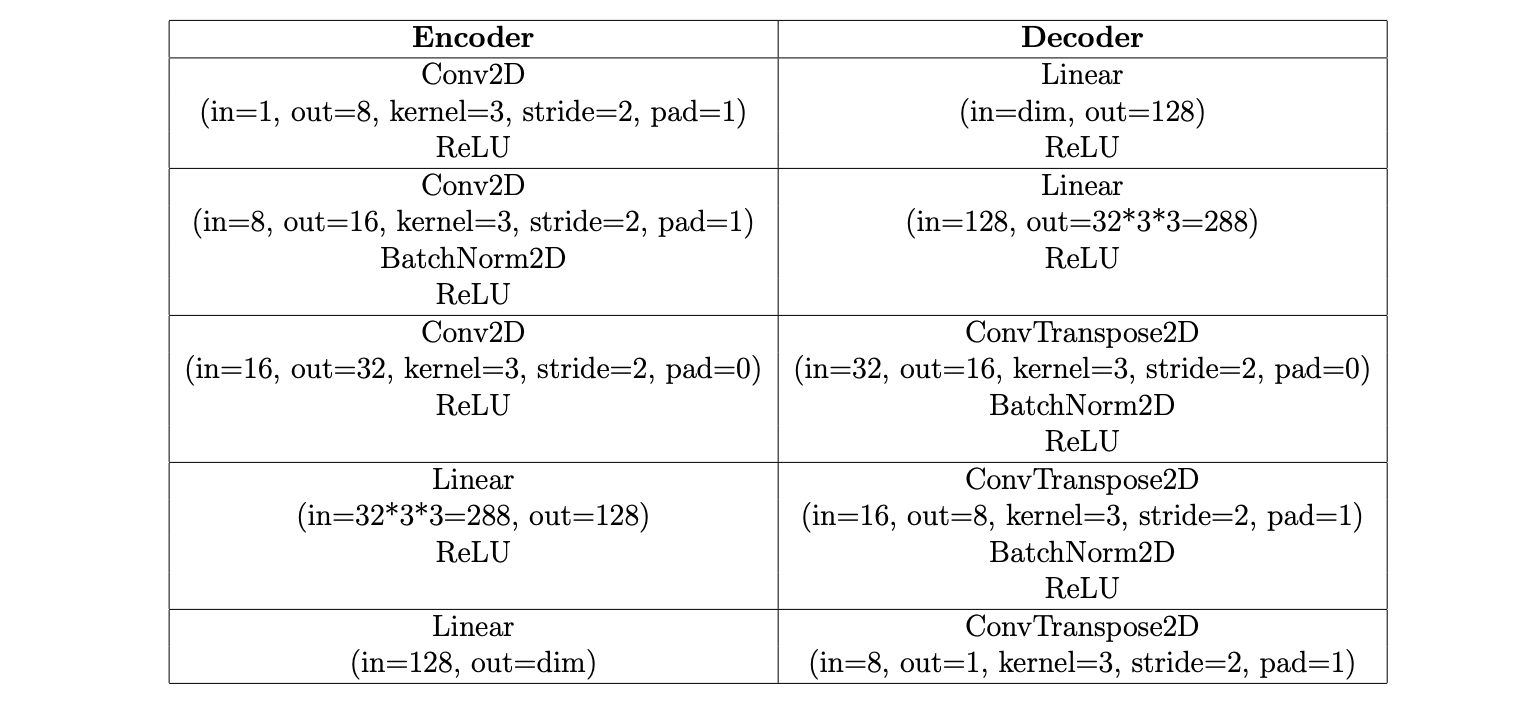

In [ ]:
# crafting the layer to one decoder class following the instruction layer
class VAutoencoder(nn.Module):
    def __init__(self):
        super(VAutoencoder, self).__init__()

        self.enc_fc1 = nn.Sequential( # like the Composition layer you built                                    
            nn.Conv2d(1, 8,  3, stride=2, padding=1),
            nn.ReLU(),
            nn.Conv2d(8, 16, 3, stride=2, padding=1),
            nn.ReLU(),
            nn.Conv2d(16, 32, 3, stride=2, padding=0),
            nn.ReLU(),
            nn.Flatten(),          
            
        )
        self.enc_fc2 = nn.Linear(in_features=32*3*3, out_features=128, bias=False)
        self.enc_fc31 = nn.Linear(in_features=128, out_features=dim, bias=False)
        self.enc_fc32 = nn.Linear(in_features=128, out_features=dim, bias=False)

        self.dec_fc1 = nn.Sequential(
             nn.Linear(in_features=dim, out_features=128,bias=False),
             nn.Linear(in_features=128, out_features=32*3*3,bias=False),
        )
        self.dec_fc2 = nn.Sequential(
            nn.Unflatten(1, torch.Size([32, 3, 3])), 
            nn.ConvTranspose2d(32, 16, 3, stride=2, padding=0),
            nn.BatchNorm2d(16),
            nn.ReLU(),
            nn.ConvTranspose2d(16, 8,  3, stride=2, padding=1),
            nn.BatchNorm2d(8),
            nn.ReLU(),
            nn.ConvTranspose2d(8, 1, 3, stride=2, padding=1)
        )
        self.dec_fc3 = nn.ZeroPad2d((1, 2, 2, 1))

    # the use of each function will be explained on the section where it applied
    def encode(self, x):
        h1 = F.relu(self.enc_fc1(x))
        h1 = F.relu(self.enc_fc2(h1))
        return self.enc_fc31(h1), self.enc_fc32(h1)

    def reparameterize(self, mu, logvar):
        std = torch.exp(0.5*logvar)
        eps = torch.randn_like(std)
        return mu + eps*std

    def decode(self, z):
        h3 = F.relu(self.dec_fc1(z))
        h3 = F.relu(self.dec_fc2(h3))
        return torch.sigmoid(self.dec_fc3(h3))

    def forward(self, x):
        mu, logvar = self.encode(x)
        z = self.reparameterize(mu, logvar)
        return self.decode(z),self.decode(mu), mu, logvar

### **Algorithm 1 Training Algorithm for Denoising Autoencoder**

Note that 32 ∗ 3 ∗ 3 is the output size of the last convolution layer of the encoder. We set
dim=128 as the dimension of our latent variable z.

In [ ]:
dim = 128

Next, implement the training steps for your denoising autoencoder. In this assignment, we
use standard Gaussian noise applied on our data ( ∼ N (; 0, I)). Below is the pseudo-code
of the training algorithm.

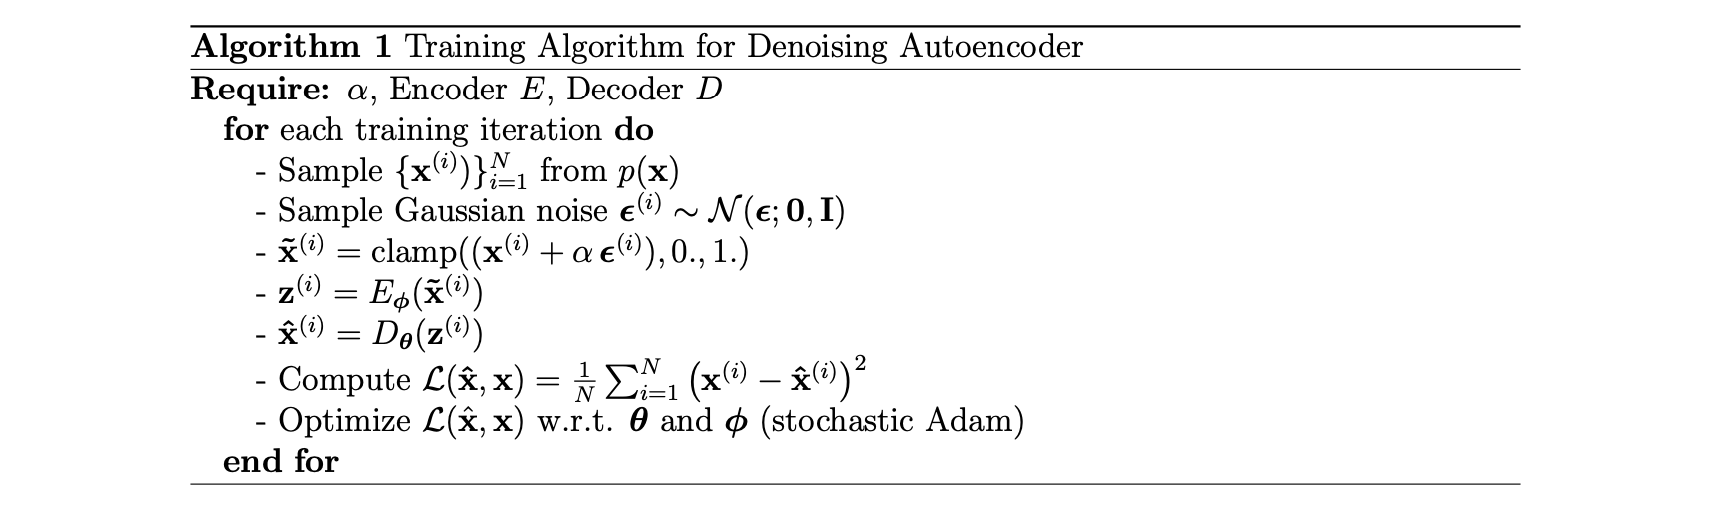

In [ ]:
# adding gaussian noise as the part of denoising autoencoder
noise_factor = 0.3

def gaussian_noise(inputs):
     noise = noise_factor * torch.randn(*inputs.shape)
     return inputs + noise

In [ ]:
# preparing the model from class Encoder and Decoder
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model_1 = VAutoencoder().to(device)

# preparing the optimizer that will be inputted to each class from the auto encoder
optimizer = optim.Adam(model_1.parameters(), lr=learning_rate)

# definine the loss function we'll use in denoising model: MSE Loss
criterion = nn.MSELoss()

In [ ]:
from torchsummary import summary
summary(model_1, (1, 28, 28))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1            [-1, 8, 14, 14]              80
              ReLU-2            [-1, 8, 14, 14]               0
            Conv2d-3             [-1, 16, 7, 7]           1,168
              ReLU-4             [-1, 16, 7, 7]               0
            Conv2d-5             [-1, 32, 3, 3]           4,640
              ReLU-6             [-1, 32, 3, 3]               0
           Flatten-7                  [-1, 288]               0
            Linear-8                  [-1, 128]          36,864
            Linear-9                  [-1, 256]          32,768
           Linear-10                  [-1, 256]          32,768
           Linear-11                  [-1, 128]          32,768
           Linear-12                  [-1, 288]          36,864
        Unflatten-13             [-1, 32, 3, 3]               0
  ConvTranspose2d-14             [-1, 1

In [ ]:
# For function for each epoch (epochs defined at the very top of problem 2)
for epoch in range(epochs):
    loss = 0

    # reading the image in batch since we divide them into batches
    for batch_features, _ in train_loader:
        
        # Gaussian Noise to the image
        noisy_imgs = gaussian_noise(batch_features)
        
        # clip the images to be between 0 and 1
        noisy_imgs = np.clip(noisy_imgs, 0., 1.)
        
        # preparing the data to go into E(x) and D(z) process
        images = noisy_imgs.to(device)
        optimizer.zero_grad()

        # encoder then decoder     
        _, outputs, _, _ = model_1(images) # z = E(x) then x_hat = D(z)
        
        # Compute loss with MSE (as defined with the criterion before )
        train_loss = criterion(outputs, images)
        train_loss.backward() # backpropoagate the loss

        # Optimize with stochastic adam to each of the autooencoder model class
        optimizer.step()
        
        loss += train_loss.item()
    
    # displaying the loss of the model to the epoch training
    loss = loss / len(train_loader)
    
    # printing the epoch & loss information for each iteration of epoch training
    print("\tEpoch", epoch + 1, "complete!", "\tLoss:  ", float(loss))

	Epoch 1 complete! 	Loss:   0.13930610113955558
	Epoch 2 complete! 	Loss:   0.13193519381766625
	Epoch 3 complete! 	Loss:   0.13057232752759407
	Epoch 4 complete! 	Loss:   0.1297837054475825
	Epoch 5 complete! 	Loss:   0.12927784494897152
	Epoch 6 complete! 	Loss:   0.12891649565798172
	Epoch 7 complete! 	Loss:   0.12860899783195334
	Epoch 8 complete! 	Loss:   0.1283529615782677
	Epoch 9 complete! 	Loss:   0.1281595253563942
	Epoch 10 complete! 	Loss:   0.12797263093451236
	Epoch 11 complete! 	Loss:   0.12781205228034487
	Epoch 12 complete! 	Loss:   0.12765932745755987
	Epoch 13 complete! 	Loss:   0.12752389159608393
	Epoch 14 complete! 	Loss:   0.12742160688689413
	Epoch 15 complete! 	Loss:   0.12731852189023443
	Epoch 16 complete! 	Loss:   0.12723333369544212
	Epoch 17 complete! 	Loss:   0.12715556900551978
	Epoch 18 complete! 	Loss:   0.1270596372320297
	Epoch 19 complete! 	Loss:   0.1270462305621898
	Epoch 20 complete! 	Loss:   0.12699021773135408
	Epoch 21 complete! 	Loss:   0.126

#### **Evaluation**

Perform image reconstruction on the test set (10000 instances), namely: given xtest, we want
to have ˆxtest by propagating our ˜xtest through the trained denoising autoencoder. Compare
xtest and ˆxtest by using MSE and cosine-similarity.

Screen Shot 2021-10-20 at 16.05.01.png

In [ ]:
# preparing the dataset for evaluation
test_dataset = torchvision.datasets.FashionMNIST(root="~/torch_datasets", train=False, transform=transform, download=True)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=10000, shuffle=False)
test_examples = test_loader

# preparing the training set with the model we'd trained, adding the gaussian noise for the 
with torch.no_grad():
    for batch_features in test_loader:
        batch_features = batch_features[0]
        test_examples = batch_features
        # adding gaussian noise
        corrupted_gaus = gaussian_noise(batch_features)
        # reconstructed the image after noised
        _, reconstruction, _ , _ = model_1(test_examples)
        break

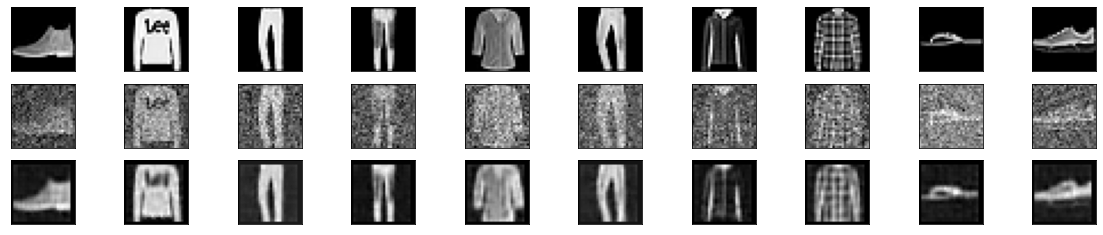

In [ ]:
# displaying and comparing the real dataset, the noised dataset, and reconstructed dataset

with torch.no_grad():
    number = 10
    plt.figure(figsize=(20, 4))
    for index in range(number):
        # display original
        ax = plt.subplot(3, number, index + 1)
        plt.imshow(test_examples[index].numpy().reshape(28, 28))
        plt.gray()
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)

        # display Gaussian corrupted image
        ax = plt.subplot(3, number, index + 1 + number)
        ax.imshow(corrupted_gaus[index].numpy().reshape(28, 28))
        plt.gray()
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)

        # display reconstruction
        ax = plt.subplot(3, number, index + 1 + number*2)
        plt.imshow(reconstruction[index].numpy().reshape(28, 28))
        plt.gray()
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)
        
    plt.show()

In [ ]:
# importing all the library that will be need to evaluate
# including the t-SNE evaluation
from sklearn.manifold import TSNE
from numpy import reshape
import numpy as np
import seaborn as sns
import pandas as pd  

In [ ]:
# storing the reconstructed image to a dataset to be evaluated
for x_test, y in test_loader:
  x_test = x_test.to(device)
  _, x_hat_test, z_test , _ = model_1(x_test)
  y_test = y

In [ ]:
# evaluate with MSE Loss function
loss_mse_cr = nn.MSELoss()
loss_mse = loss_mse_cr(x_hat_test, x_test) # evaluation compare to real dataset & constructed dataset that noised by Gaussian function
print("MSE of Denoising Autoencoder Model: ", loss_mse.item())

MSE of Denoising Autoencoder Model:  0.019793618470430374


In [ ]:
# evaluate with the cosine similarity function
loss_cos_cr = nn.CosineSimilarity(dim=1, eps=1e-6)
loss_cos = loss_cos_cr(x_hat_test, x_test).abs().mean() # evaluation compare to real dataset & constructed dataset that noised by Gaussian function
print("Cosine Similarity of Denoising Autoencoder Model: ", loss_cos.item())

Cosine Similarity of Denoising Autoencoder Model:  0.46218129992485046


In [ ]:
# visualize the latent variable with perform t-distributed stochastic neighbor embedding (t-SNE)  

z_test = z_test.detach().cpu().numpy()

tsne = TSNE(n_components=2, verbose=1, random_state=123)
z_tsne = tsne.fit_transform(z_test) 

df = pd.DataFrame()
df["y_test"] = y_test
df["comp-1"] = z_tsne[:, 0]
df["comp-2"] = z_tsne[:, 1]

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 10000 samples in 0.171s...
[t-SNE] Computed neighbors for 10000 samples in 36.682s...
[t-SNE] Computed conditional probabilities for sample 1000 / 10000
[t-SNE] Computed conditional probabilities for sample 2000 / 10000
[t-SNE] Computed conditional probabilities for sample 3000 / 10000
[t-SNE] Computed conditional probabilities for sample 4000 / 10000
[t-SNE] Computed conditional probabilities for sample 5000 / 10000
[t-SNE] Computed conditional probabilities for sample 6000 / 10000
[t-SNE] Computed conditional probabilities for sample 7000 / 10000
[t-SNE] Computed conditional probabilities for sample 8000 / 10000
[t-SNE] Computed conditional probabilities for sample 9000 / 10000
[t-SNE] Computed conditional probabilities for sample 10000 / 10000
[t-SNE] Mean sigma: 1.056083
[t-SNE] KL divergence after 250 iterations with early exaggeration: 80.156952
[t-SNE] KL divergence after 1000 iterations: 1.606247


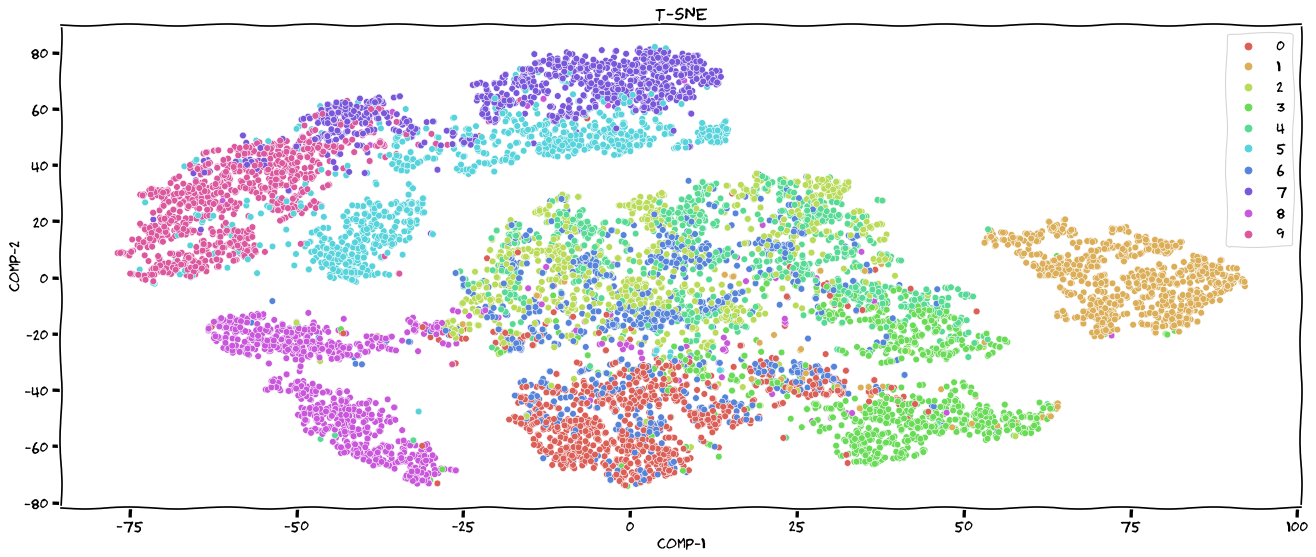

In [ ]:
# visualizing the  T-SNE from denoising autoencoder we trained :)

plt.figure(figsize=(20, 8), dpi=80)

with plt.xkcd():
  sns.scatterplot(x="comp-1", y="comp-2", hue=df.y_test.tolist(),palette=sns.color_palette("hls", 10),data=df).set(title="T-SNE") 
  plt.rc('axes', unicode_minus=False)
  plt.show()

## **2.2 Variational Autoencoder**

**Architecture**

The architecture is exactly the same with the denoising autoencoder, except that our dim=256.
Note that for VAE, the output of our encoder is the parameter distribution of qφ(z|x). In
this assignment, we assume that qφ(z|x) is following the factorized multivariate Gaussian
distribution. Hence, the last layer of our encoder outputs mean µ (linear[:128]) and the
covariance Σ (linear[128:]).

Next, implement the training steps for your variational autoencoder. Your training steps
must include the implementation of reparameterization trick.

Screen Shot 2021-10-20 at 17.14.55.png

In [ ]:
# reparameterize trick for the model already defined on the class VAutoencoder
# so the result on our model is in order
# decoder with [reparameterize trick], [decoder WITHOUT reparameterize trick], [mu], [log covariance]

In [ ]:
# defining the loss function that will be used for the VAE model
# totaling BCE with sum reduction and KL Divergence
def loss_function(recon_x, x, mu, logvar):
    BCE = F.binary_cross_entropy(recon_x, x, reduction='sum')
    KLD = -0.5 * torch.sum(1 + logvar - mu.pow(2) - logvar.exp())
    return BCE + KLD

In [ ]:
# new dimension for this point
dim = 256 

# c that will be used for the decoder cI
c = 0.001

# preparing the class Encoder and Decoder for training
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model_2 = VAutoencoder().to(device)

# preparing the optimizer for each model
optimizer = optim.Adam(model_2.parameters(), lr=learning_rate)

In [ ]:
# CREDIT TO: https://github.com/arminarj/FashionMNIST_VAE/blob/master/FashionMNIST_VAE.ipynb

losses = []

if __name__ == "__main__":
    # training the model in epochs stated (25)
    for epoch in range(epochs):
      # call the function train to update the parameter on model stated
      model_2.train()
      train_loss = 0
      # training the model in batches
      for batch_idx, (data, _) in enumerate(train_loader):
        # preparing the data into training
          data = data.to(device) 
        # defining zero gradient for the optimizer
          optimizer.zero_grad()
        # getting all the trained variable on the Var. Autoencoder model
        # the process included in this part (stated on the class VAutoencoder) are
        # E(x) then reparameterization trick then D(z)
          recon_batch, _, mu, logvar = model_2(data)
        # count the loss function from the model
        # this part include the sum total of KL Divergence loss and Binary Cross Entropy loss
          loss = loss_function(recon_batch, data, mu, logvar)
        # backpropagate the loss
          loss.backward()
        # update the train loss for train information on the model
          train_loss += loss.item()
        # update the optimizer with updated loss
          optimizer.step()
    # print the epoch information loss once the training is over
      print('\tEpoch: {} Average loss: {:.4f}'.format(epoch+1, train_loss / len(train_loader.dataset)))

  # this processed is just stated whether or not our model works good, comparing to the dataset
      model_2.eval() # stated the evaluation step
      test_loss = 0
      with torch.no_grad(): # preparing the process image
          for i, (data, _) in enumerate(test_loader): # reading the test image in test loader
              data = data.to(device) # preparing the image from the test loader
              recon_batch, _ , mu, logvar = model_2(data) # inputing the data to the model then getting the variable
              test_loss += loss_function(recon_batch, data, mu, logvar).item() # taking the loss function resulted from the model training
      test_loss /= len(test_loader.dataset) # showing the mean of loss in the epoch
      losses.append(test_loss) # store the loss of the training epoch to alist
      print('\t         Test set loss: {:.4f}'.format(test_loss)) # display the loss as the information of the epoch

  # this process is to store the image of the training (not needed but yet it's informational to see how the training effecting on
  # the image generating process)
      with torch.no_grad(): 
        sample = torch.randn(8, dim).to(device) # giving the random value that built the image
        sample = model_2.decode(sample).cpu() # inputing the sample into decode model
        save_image(sample.view(8, 1, 28, 28), f'./sample_{epoch+1}.png') # store the image in :)

	Epoch: 1 Average loss: 535.0708
	         Test set loss: 529.9087
	Epoch: 2 Average loss: 527.4390
	         Test set loss: 526.6806
	Epoch: 3 Average loss: 525.9095
	         Test set loss: 525.3517
	Epoch: 4 Average loss: 523.8795
	         Test set loss: 522.7695
	Epoch: 5 Average loss: 522.3623
	         Test set loss: 522.6008
	Epoch: 6 Average loss: 521.5111
	         Test set loss: 520.9861
	Epoch: 7 Average loss: 520.5627
	         Test set loss: 520.6134
	Epoch: 8 Average loss: 519.7903
	         Test set loss: 519.7483
	Epoch: 9 Average loss: 519.4033
	         Test set loss: 519.3494
	Epoch: 10 Average loss: 518.9287
	         Test set loss: 518.8142
	Epoch: 11 Average loss: 518.4867
	         Test set loss: 518.6671
	Epoch: 12 Average loss: 518.3114
	         Test set loss: 518.3938
	Epoch: 13 Average loss: 518.1883
	         Test set loss: 518.2620
	Epoch: 14 Average loss: 518.1134
	         Test set loss: 518.4506
	Epoch: 15 Average loss: 518.0069
	         Test set loss

In [ ]:
from IPython.display import Image
plt.figure(figsize=(20, 8), dpi=80)

# visualize the training process of variational autoencoder model with the losses we stored previously on the list
with plt.xkcd():    
    plt.plot(losses)
    plt.show()

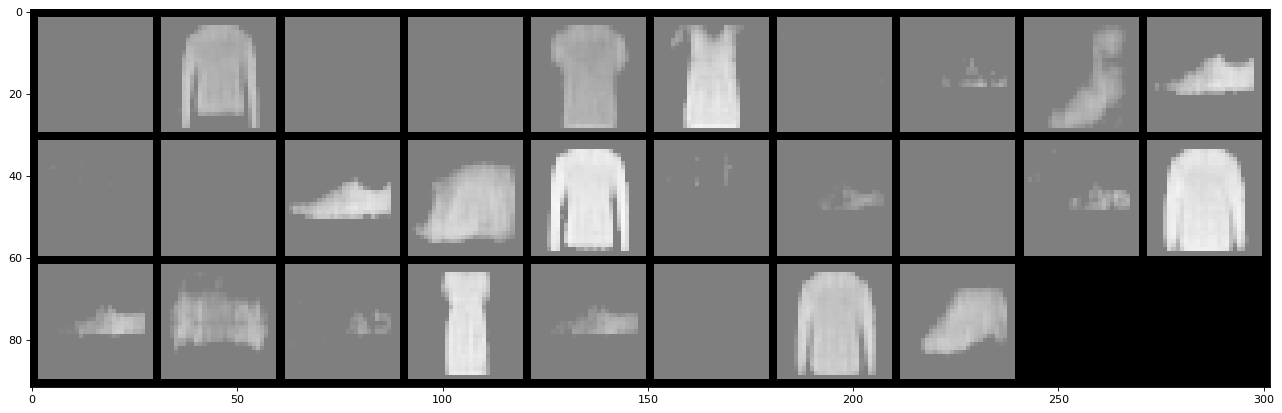

In [ ]:
from torchvision.utils import save_image
import torchvision

# generating image we previously trained
plt.figure(figsize=(20, 8), dpi=80)
with torch.no_grad():
    z_test = torch.randn(28, dim).to(device)
    reconstruction = model_2.decode(z_test)

    grid_img = torchvision.utils.make_grid(reconstruction.detach().cpu(), nrow=10)
    plt.imshow(grid_img.permute(1, 2, 0))

In [ ]:
# importing all the library that will be need to evaluate
# including the t-SNE evaluation
from sklearn.manifold import TSNE
from numpy import reshape
import numpy as np
import seaborn as sns
import pandas as pd  

In [ ]:
# preparing the dataset for evaluation
test_dataset = torchvision.datasets.FashionMNIST(root="~/torch_datasets", train=False, transform=transforms.ToTensor(), download=True)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=10000, shuffle=False)
test_examples = test_loader

  0%|          | 0/26421880 [00:00<?, ?it/s]

Extracting /root/torch_datasets/FashionMNIST/raw/train-images-idx3-ubyte.gz to /root/torch_datasets/FashionMNIST/raw



  0%|          | 0/29515 [00:00<?, ?it/s]

Extracting /root/torch_datasets/FashionMNIST/raw/train-labels-idx1-ubyte.gz to /root/torch_datasets/FashionMNIST/raw



  0%|          | 0/4422102 [00:00<?, ?it/s]

Extracting /root/torch_datasets/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to /root/torch_datasets/FashionMNIST/raw



  0%|          | 0/5148 [00:00<?, ?it/s]

Extracting /root/torch_datasets/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to /root/torch_datasets/FashionMNIST/raw



In [ ]:
# storing the reconstructed image to a dataset to be evaluated
for batch_idx, (data, y) in enumerate(test_loader):
  x_test = data.to(device)
  z_test = torch.randn(x_test.size(0), dim).to(device)
  x_hat_test, _ , z_test , _ = model_2(x_test)
  y_test = y

In [ ]:
# evaluate with MSE Loss function
loss_mse_cr = nn.MSELoss()
loss_mse = loss_mse_cr(x_hat_test, x_test) # evaluation compare to real dataset & constructed dataset that noised by Gaussian function
print("MSE of Denoising Autoencoder Model: ", loss_mse.item())

MSE of Denoising Autoencoder Model:  0.15152917802333832


In [ ]:
# evaluate with the cosine similarity function
loss_cos_cr = nn.CosineSimilarity(dim=1, eps=1e-6)
loss_cos = loss_cos_cr(x_hat_test, x_test).abs().mean() # evaluation compare to real dataset & constructed dataset that noised by Gaussian function
print("Cosine Similarity of Denoising Autoencoder Model: ", loss_cos.item())

Cosine Similarity of Denoising Autoencoder Model:  0.5001041889190674


In [ ]:
# visualize the latent variable with perform t-distributed stochastic neighbor embedding (t-SNE)  

z_test = z_test.detach().cpu().numpy()

tsne = TSNE(n_components=2, verbose=1, random_state=123)
z_tsne = tsne.fit_transform(z_test) 

df = pd.DataFrame()
df["y_test"] = y_test
df["comp-1"] = z_tsne[:, 0]
df["comp-2"] = z_tsne[:, 1]

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 10000 samples in 0.378s...
[t-SNE] Computed neighbors for 10000 samples in 9.201s...
[t-SNE] Computed conditional probabilities for sample 1000 / 10000
[t-SNE] Computed conditional probabilities for sample 2000 / 10000
[t-SNE] Computed conditional probabilities for sample 3000 / 10000
[t-SNE] Computed conditional probabilities for sample 4000 / 10000
[t-SNE] Computed conditional probabilities for sample 5000 / 10000
[t-SNE] Computed conditional probabilities for sample 6000 / 10000
[t-SNE] Computed conditional probabilities for sample 7000 / 10000
[t-SNE] Computed conditional probabilities for sample 8000 / 10000
[t-SNE] Computed conditional probabilities for sample 9000 / 10000
[t-SNE] Computed conditional probabilities for sample 10000 / 10000
[t-SNE] Mean sigma: 0.034136
[t-SNE] KL divergence after 250 iterations with early exaggeration: 78.073433
[t-SNE] KL divergence after 1000 iterations: 1.372044


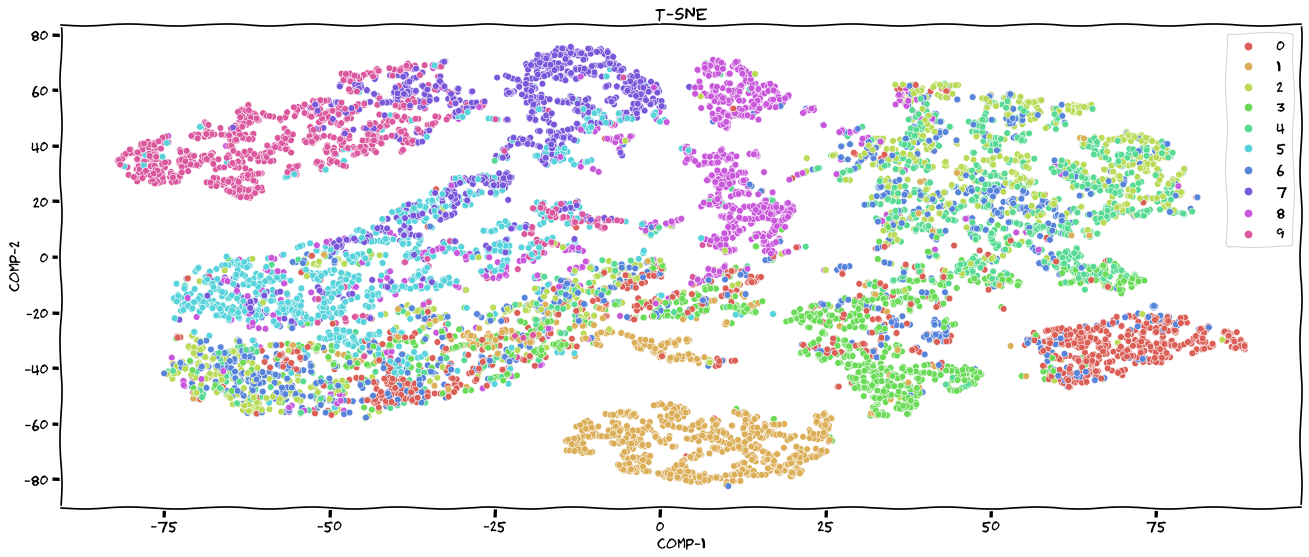

In [ ]:
# visualizing the  T-SNE from denoising autoencoder we trained :)

plt.figure(figsize=(20, 8), dpi=80)

with plt.xkcd():
  sns.scatterplot(x="comp-1", y="comp-2", hue=df.y_test.tolist(),palette=sns.color_palette("hls", 10),data=df).set(title="T-SNE") 
  plt.rc('axes', unicode_minus=False)
  plt.show()

## **2.3 Variational Autoencoder with Discriminator**

In [ ]:
class Discriminator(nn.Module):
    def __init__(self, latent_size=2):
        super(Discriminator, self).__init__()
        self.discriminator_layer = nn.Sequential(
            nn.Conv2d(1, 8, 3, stride=2, padding=1),
            nn.LeakyReLU(negative_slope=0.02),
            nn.Conv2d(8, 16, 3, stride=2, padding=1),
            nn.BatchNorm2d(16),
            nn.LeakyReLU(negative_slope=0.02),
            nn.Conv2d(16, 32, 3, stride=2, padding=0),
            nn.LeakyReLU(negative_slope=0.02),
            nn.Flatten(),
            nn.Linear(32*3*3, 784),
            nn.LeakyReLU(negative_slope=0.02),
        )

        self.discriminator_layer_out = nn.Sequential(
            nn.Linear(784, 1),
            nn.Sigmoid()
        )

    def forward(self, x):
      discriminator = self.discriminator_layer(x)
      discriminator_ = self.discriminator_layer_out(discriminator)
      
      return discriminator_, discriminator

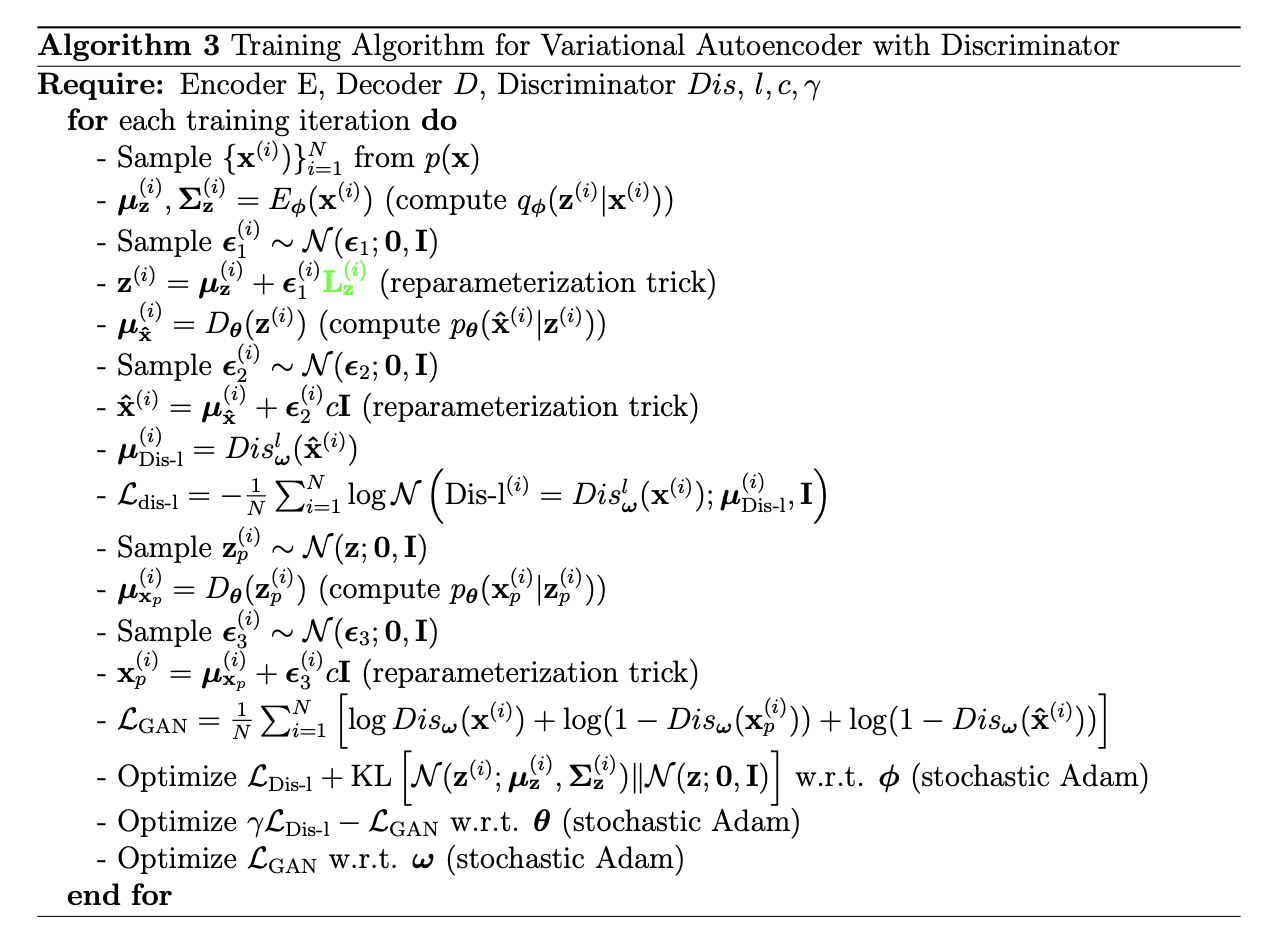

In [ ]:
# new dimension for this point
dim = 256 

# c that will be used for the decoder cI
c = 0.001

# preparing the class Encoder and Decoder for training
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model_3 = VAutoencoder().to(device)
model_dis = Discriminator().to(device)

# preparing the optimizer for each model
optimizer_g = optim.Adam(model_3.parameters(), lr=learning_rate)
optimizer_d = optim.Adam(model_dis.parameters(), lr=learning_rate)

In [ ]:
# modifying the model from the variational autoencoder, included the discriminator in the 
d_losses = []
g_losses = []

if __name__ == "__main__":
    # training the model in epochs stated (25)
    for epoch in range(epochs):
      # call the function train to update the parameter on model stated
      model_3.train()
      train_loss = 0
      discriminator_loss = 0
      # training the model in batches
      for batch_idx, (data, _) in enumerate(train_loader):
        # preparing the data into training
        data = data.to(device) 
        X = data

        # defining zero gradient for the optimizer
        optimizer_g.zero_grad()
        optimizer_d.zero_grad()
# ------------------------------------------------Discriminator------------------------------------------------------------ #
        batch_size = X.size()[0] # getting the information of division on the batch size
        y = torch.ones(batch_size, 1) # create a matrix identity for comparison 
        z = torch.randn_like(X).to(device) # create a random value in data input shape

        d_output, _ , mu, logvar = model_3(X) # generate the model with the actual data
        d_real_loss = loss_function(d_output, X, mu, logvar)   # then get the actual loss from the training with real data

        x_hat_mu , x_hat_log = model_3.encode(z) # then generate the same model but with the input on the random matrix
        x_hat = model_3.decode(x_hat_mu*c) # since matrix defined random from beginning, the c in the process is implemented here 
                                           # (and not using previous reparameterization trick)
        y_hat = torch.zeros(batch_size, 1).to(device) # create the matrix identity also
        d_output, _ = model_dis(x_hat) # model with discriminator layer and x_hat input

        # basically just preparing the data, for the loss function since d_output, x_hat_log, and x_hat_mu variable names used twice 
        # in this process of training
        d_output = d_output.detach() # detaching the value from the previous one
        d_output.requires_grad = True  # making sure that the value still needs the gradient
        x_hat_log = x_hat_log.detach()
        x_hat_log.requires_grad = True
        x_hat_mu = x_hat_mu.detach()
        x_hat_mu.requires_grad = True
        
        # count the fake loss of the fake model
        d_fake_loss = loss_function(d_output, y_hat, x_hat_mu, x_hat_log)

        d_loss = d_real_loss + d_fake_loss # summing all counts from both real and fake model training

        # backpropagate the loss of the discriminator
        d_loss.backward()
        
        # storing the discriminator loss
        discriminator_loss += d_loss.item()
        
        # updating the optimizer on discriminator model
        optimizer_d.step()

        # append the value to make sure we keep on track on the epoch training :)
        d_losses.append(d_loss.data.item())

# ------------------------------------------------Generator------------------------------------------------------------ #
        # create an input matrix as loss measurement for the generator model (VAE)
        z = torch.randn_like(X).to(device) 
        y_hat = torch.ones(batch_size, 1).to(device)

        # input the matrix into the encoder layer
        x_hat_mu, x_hat_log = model_3.encode(z)
        x_hat_mu, x_hat_log = x_hat_mu.to(device), x_hat_log.to(device) 
        # applying the variables given by encoder
        x_hat, _ , _ , _ = model_3(z)
        d_output, _ = model_dis(x_hat)

        # count the loss function from the model
        # this part include the sum total of KL Divergence loss and Binary Cross Entropy loss
        g_loss = loss_function(d_output, y_hat, x_hat_mu, x_hat_log)

        # backpropagate the loss
        g_loss.backward()

        # update the train loss for train information on the model
        train_loss += g_loss.item()

        # update the optimizer with updated loss
        optimizer_g.step()
        g_losses.append(g_loss.data.item())

    # print the epoch information loss once the training is over
      print('\tEpoch {} Average loss for model: {:.4f}'.format(epoch+1, train_loss / len(train_loader.dataset)))

  # this process is to store the image of the training (not needed but yet it's informational to see how the training effecting on
  # the image generating process)
      with torch.no_grad(): 
        sample = torch.randn(8, dim).to(device) # giving the random value that built the image
        sample = model_3.decode(sample).cpu() # inputing the sample into decode model
        save_image(sample.view(8, 1, 28, 28), f'./sample_{epoch+1}.png') # store the image in :)

	Epoch 1 Average loss for model: 0.6520
	Epoch 2 Average loss for model: 0.6529
	Epoch 3 Average loss for model: 0.6532
	Epoch 4 Average loss for model: 0.6535
	Epoch 5 Average loss for model: 0.6533
	Epoch 6 Average loss for model: 0.6530
	Epoch 7 Average loss for model: 0.6530
	Epoch 8 Average loss for model: 0.6533
	Epoch 9 Average loss for model: 0.6535
	Epoch 10 Average loss for model: 0.6535
	Epoch 11 Average loss for model: 0.6535
	Epoch 12 Average loss for model: 0.6534
	Epoch 13 Average loss for model: 0.6534
	Epoch 14 Average loss for model: 0.6534
	Epoch 15 Average loss for model: 0.6535
	Epoch 16 Average loss for model: 0.6533
	Epoch 17 Average loss for model: 0.6533
	Epoch 18 Average loss for model: 0.6533
	Epoch 19 Average loss for model: 0.6533
	Epoch 20 Average loss for model: 0.6532
	Epoch 21 Average loss for model: 0.6531
	Epoch 22 Average loss for model: 0.6531
	Epoch 23 Average loss for model: 0.6532
	Epoch 24 Average loss for model: 0.6531
	Epoch 25 Average loss fo

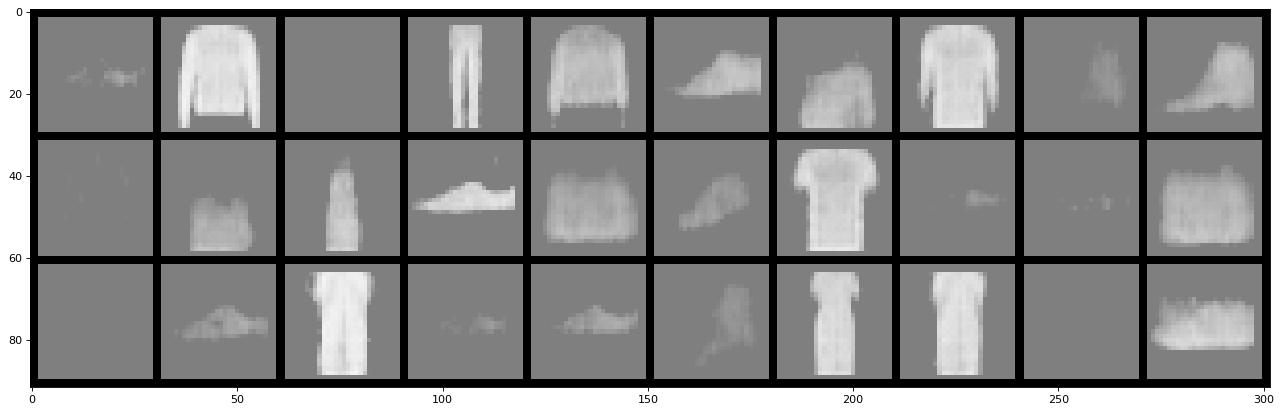

In [ ]:
from torchvision.utils import save_image
import torchvision

# generating image we previously trained
plt.figure(figsize=(20, 8), dpi=80)
with torch.no_grad():
    z_test = torch.randn(30, dim).to(device)
    reconstruction = model_3.decode(z_test)

    grid_img = torchvision.utils.make_grid(reconstruction.detach().cpu(), nrow=10)
    plt.imshow(grid_img.permute(1, 2, 0))

In [ ]:
# importing all the library that will be need to evaluate
# including the t-SNE evaluation
from sklearn.manifold import TSNE
from numpy import reshape
import numpy as np
import seaborn as sns
import pandas as pd  

In [ ]:
# preparing the dataset for evaluation
test_dataset = torchvision.datasets.FashionMNIST(root="~/torch_datasets", train=False, transform=transforms.ToTensor(), download=True)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=10000, shuffle=False)
test_examples = test_loader

In [ ]:
# storing the reconstructed image to a dataset to be evaluated
for batch_idx, (data, y) in enumerate(test_loader):
  x_test = data.to(device)
  z_test = torch.randn(x_test.size(0), dim).to(device)
  x_hat_test, _ , z_test , _ = model_3(x_test)
  y_test = y

In [ ]:
# evaluate with MSE Loss function
loss_mse_cr = nn.MSELoss()
loss_mse = loss_mse_cr(x_hat_test, x_test) # evaluation compare to real dataset & constructed dataset that noised by Gaussian function
print("MSE of Denoising Autoencoder Model: ", loss_mse.item())

MSE of Denoising Autoencoder Model:  0.15206612646579742


In [ ]:
# evaluate with the cosine similarity function
loss_cos_cr = nn.CosineSimilarity(dim=1, eps=1e-6)
loss_cos = loss_cos_cr(x_hat_test, x_test).abs().mean() # evaluation compare to real dataset & constructed dataset that noised by Gaussian function
print("Cosine Similarity of Denoising Autoencoder Model: ", loss_cos.item())

Cosine Similarity of Denoising Autoencoder Model:  0.5001041889190674


In [ ]:
# visualize the latent variable with perform t-distributed stochastic neighbor embedding (t-SNE)  

z_test = z_test.detach().cpu().numpy()

tsne = TSNE(n_components=2, verbose=1, random_state=123)
z_tsne = tsne.fit_transform(z_test) 

df = pd.DataFrame()
df["y_test"] = y_test
df["comp-1"] = z_tsne[:, 0]
df["comp-2"] = z_tsne[:, 1]

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 10000 samples in 0.348s...
[t-SNE] Computed neighbors for 10000 samples in 9.188s...
[t-SNE] Computed conditional probabilities for sample 1000 / 10000
[t-SNE] Computed conditional probabilities for sample 2000 / 10000
[t-SNE] Computed conditional probabilities for sample 3000 / 10000
[t-SNE] Computed conditional probabilities for sample 4000 / 10000
[t-SNE] Computed conditional probabilities for sample 5000 / 10000
[t-SNE] Computed conditional probabilities for sample 6000 / 10000
[t-SNE] Computed conditional probabilities for sample 7000 / 10000
[t-SNE] Computed conditional probabilities for sample 8000 / 10000
[t-SNE] Computed conditional probabilities for sample 9000 / 10000
[t-SNE] Computed conditional probabilities for sample 10000 / 10000
[t-SNE] Mean sigma: 0.037075
[t-SNE] KL divergence after 250 iterations with early exaggeration: 77.877831
[t-SNE] KL divergence after 1000 iterations: 1.342279


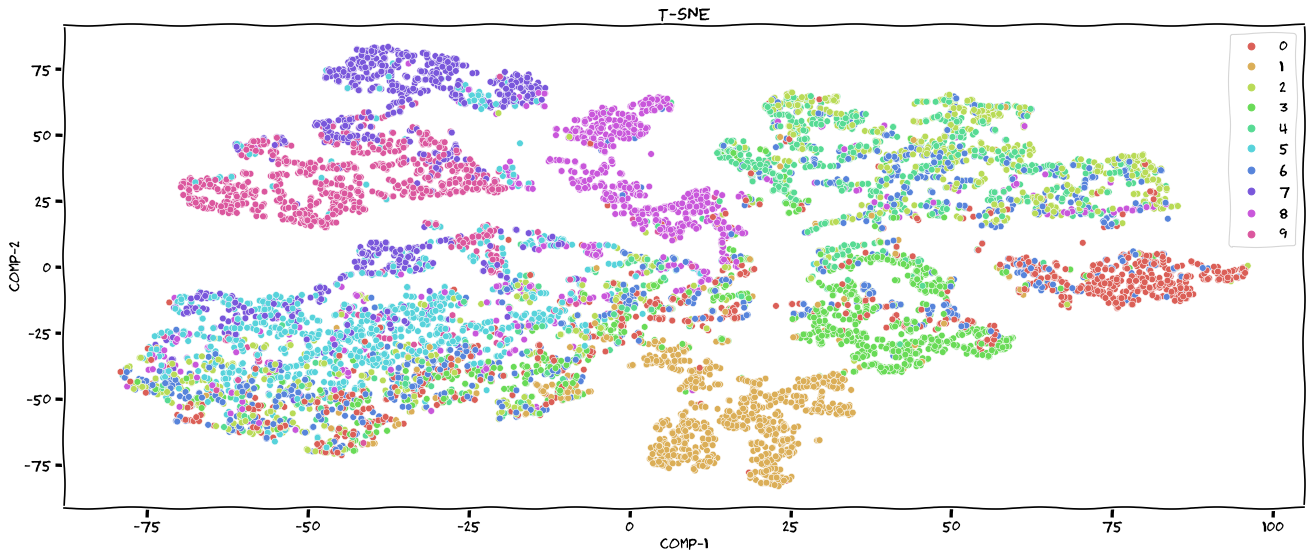

In [ ]:
# visualizing the  T-SNE from vae-gan we trained :)

plt.figure(figsize=(20, 8), dpi=80)

with plt.xkcd():
  sns.scatterplot(x="comp-1", y="comp-2", hue=df.y_test.tolist(),palette=sns.color_palette("hls", 10),data=df).set(title="T-SNE") 
  plt.rc('axes', unicode_minus=False)
  plt.show()